# Using Spark GraphFrames to detect communities in the network graph

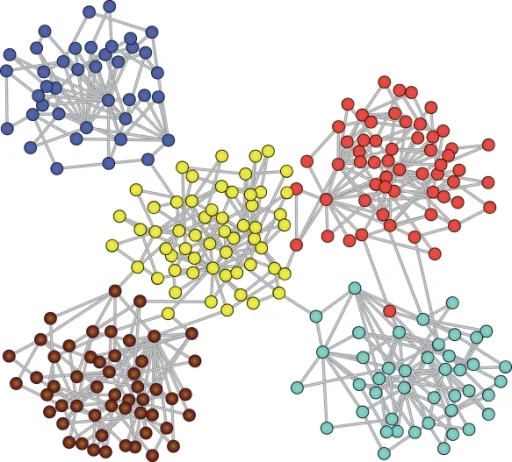

In [1]:
import findspark
findspark.init()

In [2]:
import time
import sys
import pandas as pd

In [3]:
from pyspark.sql import SQLContext
from pyspark import SparkContext, SparkConf
from graphframes import GraphFrame

In [4]:
conf = SparkConf().setAppName("task1_v2").setMaster("local[*]")
sc = SparkContext(conf=conf)
sqlContext = SQLContext(sc)

C:\spark\spark-3.4.1-bin-hadoop3\python\pyspark\sql\context.py:112: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


In [5]:
input_file_path = 'ub_sample_data.csv'

### Initial Data Format

The data is composed of two columns: user id and business id. <br>
This format of the data is not apt for community detection. <br>
Therefore, we will need to reformat.

In [6]:
df = pd.read_csv('ub_sample_data.csv')
df.head()

,user_id,business_id
0,39FT2Ui8KUXwmUt6hnwy-g,RJSFI7mxGnkIIKiJCufLkg
1,39FT2Ui8KUXwmUt6hnwy-g,fThrN4tfupIGetkrz18JOg
2,39FT2Ui8KUXwmUt6hnwy-g,mvLdgkwBzqllHWHwS-ZZgQ
3,39FT2Ui8KUXwmUt6hnwy-g,uW6UHfONAmm8QttPkbMewQ
4,39FT2Ui8KUXwmUt6hnwy-g,T70pMoTP008qYLsIvFCXdQ


### Initial Data Input

##### .filter(lambda x: x != 'user_id,business_id') 
Removes the header <br>

##### .map(lambda x: x.split(",")) 
Turns each row into a list with two elements: user id and business id.

In [7]:
data = sc.textFile(input_file_path).filter(lambda x: x != 'user_id,business_id').map(lambda x: x.split(",")).persist()

In [8]:
data.take(5)

[['39FT2Ui8KUXwmUt6hnwy-g', 'RJSFI7mxGnkIIKiJCufLkg'],
 ['39FT2Ui8KUXwmUt6hnwy-g', 'fThrN4tfupIGetkrz18JOg'],
 ['39FT2Ui8KUXwmUt6hnwy-g', 'mvLdgkwBzqllHWHwS-ZZgQ'],
 ['39FT2Ui8KUXwmUt6hnwy-g', 'uW6UHfONAmm8QttPkbMewQ'],
 ['39FT2Ui8KUXwmUt6hnwy-g', 'T70pMoTP008qYLsIvFCXdQ']]

### Data Reformat (i)

We will assume that when there are more than 7 common businesses two users have in common, there will be an edge between those two verticies.

In [9]:
threshold = 7

In [10]:
vertex_list = data.map(lambda x: x[0]).distinct().collect() # to uniquely identify verticies
vertex_list[0:10] # sample look

['39FT2Ui8KUXwmUt6hnwy-g',
 '0FVcoJko1kfZCrJRfssfIA',
 '_6Zg4ukwS0kst9UtkfVw3w',
 'JM0GL6Dx4EuZ1mprLk5Gyg',
 'LcCRMIDz1JgshpPGYfLDcA',
 'bSUS0YcvS7UelmHvCzNWBA',
 'lJFBgSAccsMGwIjfD7LMeQ',
 '23o7tyUGlC6FCDVcyqLeFA',
 'CLbpPUqP6XpeAfoqScGaJQ',
 'CMu9FmdK8xpiawJowJuGQg']

In [11]:
u_to_b = data.groupByKey().mapValues(set).collectAsMap()
u_to_b[vertex_list[0]]

{'-JFVxwdVQfX207554dx1nw',
 '-YGQwikbX2fXUIjyegR7pw',
 '-kG0N8sBhBotMbu0KVSPaw',
 '-kyvpeXIuQDKIYDkAK7ryw',
 '-zbcosKSMGDhaZYN-CrcVA',
 '02Ycww2etUAxorZb5gIM8Q',
 '0KjY3gmtqQjc4sK-uG-6fQ',
 '0jHZk9RrKh0uRhTRW1XIqQ',
 '0ptR21GHRuQ1MFtxGNcxzw',
 '0sPOBQHlVvuhO1h-1p1ccQ',
 '1NZonnS3SpogXaZJigVgqA',
 '1jpYP-JNOEYCMIzP4OlGuQ',
 '20ib4z2Yo2wlfARFMcFwSQ',
 '2g_auUWw7c3c2CUTgVqI8Q',
 '2hgN9BGgenv8mZ0A8ybhGQ',
 '338D7EQfInzHV8Ve1b0-eQ',
 '364hhL5st0LV16UcBHRJ3A',
 '3OKwP3ylofhDJDtWJQu5GQ',
 '3ViGD_AF1AUmxF4zeHB_kQ',
 '3uOxuJUnx72b86-3NKhX0A',
 '3vxIqhm2jCVjkUWtmDvTsw',
 '44FSoN5Wj2B9vZTTYHlQZQ',
 '476CROJauLg6CtssqHRxmA',
 '47guZqFjz2V5TJcdtvooJw',
 '4BBda3yy_8GXGmYLcgggHw',
 '4GJc_Ls4f2uVptSfFQTL5g',
 '4JNXUYY8wbaaDmk3BPzlWw',
 '50tjBMTlIbFBxjTRXAVZHQ',
 '5CJL_2-XwCGBmOav4mFdYg',
 '5KcrEqWVHrkBH9W8H6cC9w',
 '5mu4SWwVTgNUXw0lWLaoZw',
 '5xYk23lz0ktdMvzHtohymQ',
 '66VUcHJlDmRANxSb9skvMA',
 '67Pa_CtXthgJzXfY8JzLDQ',
 '68jn0s0snbO5dhasLaVvDw',
 '6Eks3cn0UGUqQjXxXpSPDg',
 '6OkjUz-I552moryf3qN1Gg',
 

- For each user, compile a list/set of businesses a user is interested in <br>
- Format is: user_id: {busines_id_1, business_id_2,....}

### Data Reformat (ii)

Iteratively, check whether there exists an edge between all pair combination of vertices. <br>
- Can reduce the duration in half by checking half of the matrix (triangle)
- Must record edges from both side (A,B), (B,A) since our graph will be undirected and unweighted
- Must eliminate vertices that don't have edges

In [12]:
def find_edge():
    edge_list = []
    final_vertex_list = set()
    length = len(vertex_list)
    for i in range(0,length-1,1):
        for j in range(i+1,length,1):
            if len(u_to_b[vertex_list[i]].intersection(u_to_b[vertex_list[j]])) >= threshold:
                edge_list.append([vertex_list[i],vertex_list[j]])
                edge_list.append([vertex_list[j],vertex_list[i]])
                final_vertex_list.add(tuple([vertex_list[i],]))
                final_vertex_list.add(tuple([vertex_list[j],]))
                
    return edge_list, tuple(final_vertex_list)

In [13]:
edge_list, final_vertex_list = find_edge()

In [15]:
edge_list[0:5]

[['39FT2Ui8KUXwmUt6hnwy-g', '0FVcoJko1kfZCrJRfssfIA'],
 ['0FVcoJko1kfZCrJRfssfIA', '39FT2Ui8KUXwmUt6hnwy-g'],
 ['39FT2Ui8KUXwmUt6hnwy-g', 'JM0GL6Dx4EuZ1mprLk5Gyg'],
 ['JM0GL6Dx4EuZ1mprLk5Gyg', '39FT2Ui8KUXwmUt6hnwy-g'],
 ['39FT2Ui8KUXwmUt6hnwy-g', 'bSUS0YcvS7UelmHvCzNWBA']]

In [16]:
final_vertex_list[0:5]

(('23y0Nv9FFWn_3UWudpnFMA',),
 ('vENR70IrUsDNTDebbuxyQA',),
 ('2xVrxhQJUBmOyG4ML77XKw',),
 ('fcWM-oqjgS94yi1INhZa0g',),
 ('XrRLaAeV20MRwdSIGjj2SQ',))

### Data Reformat (iii)
Turn data into DataFrame to input into GraphFrame

In [17]:
vertices = sqlContext.createDataFrame(final_vertex_list, ["id"])
edges = sqlContext.createDataFrame(edge_list, ["src", "dst"])

In [18]:
graph = GraphFrame(vertices, edges)
result = graph.labelPropagation(maxIter=5)

### Final Result

We have 39 communities.

In [20]:
answer = result.rdd.map(lambda x: [x[1],x[0]]).groupByKey().map(lambda x: (len(x[1]),sorted(x[1]))).groupByKey()\
.flatMap(lambda x: sorted(x[1])).collect()

In [22]:
len(answer)

39

In [66]:
counter = 1
for i in answer:
    if len(str(i)) < 120:
        print(str(counter)+'. ' + str(i))
        counter+=1
    else:
        temp = str(i)[0:120] + "....."
        print(str(counter)+'. ' + temp)
        counter+=1

1. ['23y0Nv9FFWn_3UWudpnFMA']
2. ['3Vd_ATdvvuVVgn_YCpz8fw']
3. ['453V8MlGr8y61PpsDAFjKQ']
4. ['46HhzhpBfTdTSB5ceTx_Og']
5. ['Cf0chERnfd06ltnN45xLNQ']
6. ['F47atsRPw-KHmRVk5exBFw']
7. ['JeOHA8tW7gr-FDYOcPJoeA']
8. ['QYKexxaOJQlseGWmc6soRg']
9. ['SdXxLZQQnQNUEL1rGMOQ6w']
10. ['Si3aMsOVGSVlsc54iuiPwA']
11. ['YVQFzWm0H72mLUh-8gzd5w']
12. ['_m1ot2zZetDgjerAD2Sidg']
13. ['d5WLqmTMvmL7-RmUDVKqqQ']
14. ['eqWEgMH-DCP74i82BEAZzw']
15. ['gH0dJQhyKUOVCKQA6sqAnw']
16. ['gUu0uaiU7UEUVIgCdnqPVQ']
17. ['jJDUCuPwVqwjbth3s92whA']
18. ['jSbXY_rno4hYHQCFftsWXg']
19. ['tX0r-C9BaHYEolRUfufTsQ']
20. ['vENR70IrUsDNTDebbuxyQA']
21. ['0KhRPd66BZGHCtsb9mGh_g', '5fQ9P6kbQM_E0dx8DL6JWA']
22. ['98rLDXbloLXekGjieuQSlA', 'MJ0Wphhko2-LbJ0uZ5XyQA']
23. ['EY8h9IJimXDNbPXVFpYF3A', 'LiNx18WUre9WFCEQlUhtKA']
24. ['Gr-MqCunME2K_KmsAwjpTA', '_6Zg4ukwS0kst9UtkfVw3w']
25. ['QRsuZ_LqrRU65dTs5CL4Lw', 'lJFBgSAccsMGwIjfD7LMeQ']
26. ['S1cjSFKcS5NVc3o1MkfpwA', 'mm9WYrFhiNqvHCyhQKw3Mg']
27. ['750rhwO7D_Cul7_GtO9Jsg', 'DjcRgZ0cJbf6-W2